<a href="https://colab.research.google.com/github/Shryaaa/shreya/blob/main/Netflix_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded =files.upload()
df=pd.read_csv('netflix_titles.csv')
df.head(10)

Saving netflix_titles.csv to netflix_titles (2).csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [7]:
df.shape

(8807, 12)

In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df=df.dropna(axis=1)

In [11]:
df.dtypes

show_id         object
type            object
title           object
release_year     int64
listed_in       object
description     object
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


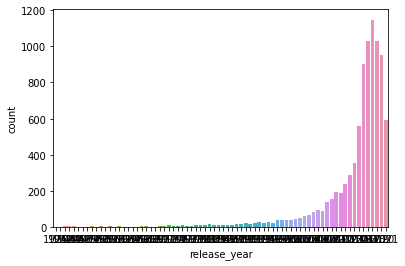

In [14]:
sns.countplot(df['release_year'],label='count')

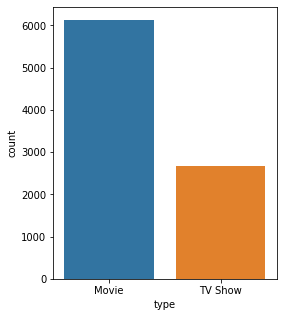

In [20]:
plt.figure(figsize=(4,5))
sns.countplot(x='type',data=df)

In [28]:
def bar_plot_data_v2(df: dict, field: dict, subtitle: str, figsize=(5, 4), top_filter=15, inverted_x=False):
    fig, ax1 = plt.subplots(figsize=figsize, dpi=100)
    
    for spline in ['top', 'right', 'left']:
        ax1.spines[spline].set_visible(False)

    if top_filter:
        df = df.head(top_filter)
    sns.barplot(data=df, palette='cool', x=field["x"], y=field["y"])
    ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
    ax1.set_xlabel(f'{field["x"]}', fontsize=13, color = '#333F4B')
    ax1.set_ylabel(f'{field["y"]}', fontsize=13, color = '#333F4B')
    
    if inverted_x:
        plt.xticks(rotation=90)
        
    plt.plot(color="white", lw=3)
    fig.suptitle(subtitle, fontsize=18)
    plt.show()

def bar_plot_data(df: dict, field: str, subtitle: str, figsize=(5, 4), top_filter=15):
    fig, ax1 = plt.subplots(figsize=figsize, dpi=100)
    for spline in ['top', 'right', 'left']:
        ax1.spines[spline].set_visible(False)
          
    df_filter = df[field].value_counts().rename_axis(field).reset_index(name='counts')
    if top_filter:
        df_filter = df_filter.head(top_filter)
    sns.barplot(data=df_filter, palette='cool', x='counts', y=field)
    ax1.tick_params(axis='both', which='both', labelsize=12, bottom=True, left=False)
    ax1.set_xlabel(f'count', fontsize=13, color = '#333F4B')
    ax1.set_ylabel(f'{field}', fontsize=13, color = '#333F4B')

    plt.plot(color="white", lw=3)
    fig.suptitle(subtitle, fontsize=18)
    plt.show()

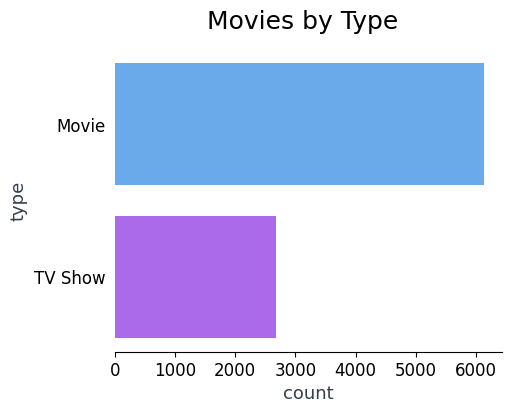

In [29]:
bar_plot_data(df, "type", "Movies by Type")


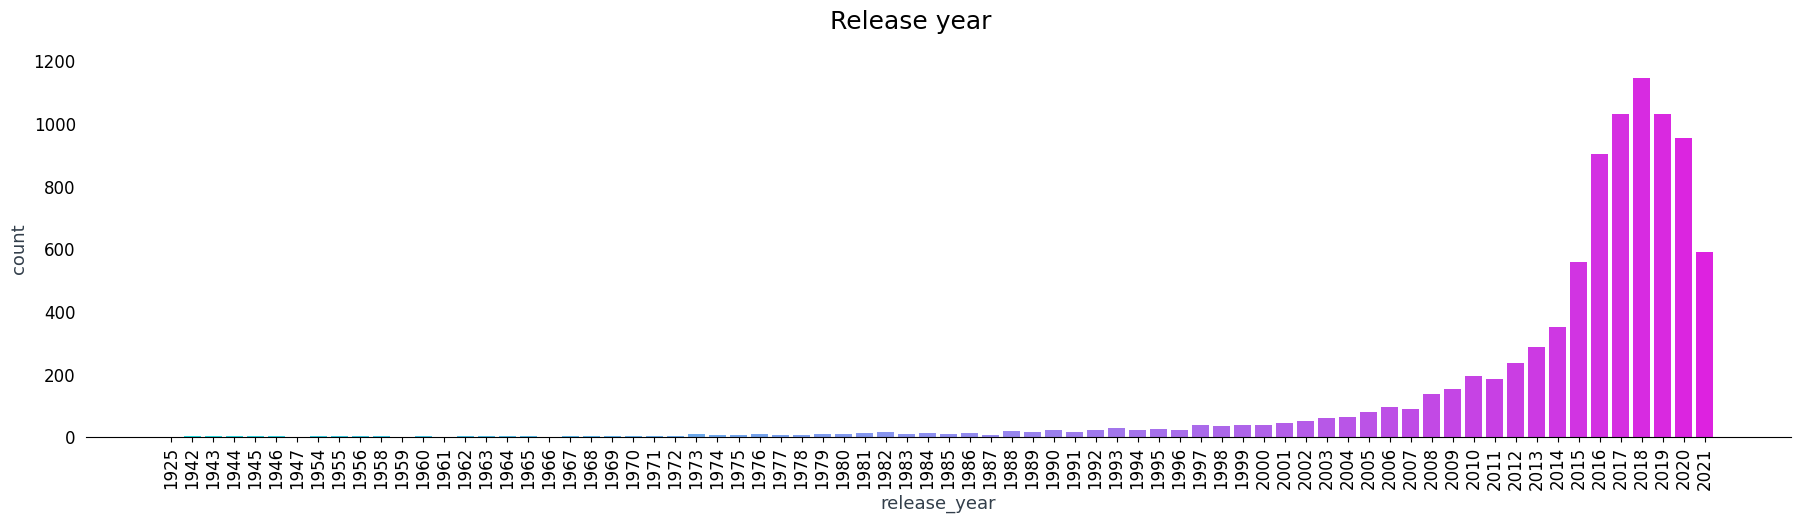

In [33]:
df_filter = df["release_year"].value_counts().rename_axis("release_year").reset_index(name='count')
bar_plot_data_v2(df_filter,  {"y": "count", "x": "release_year"}, "Release year", (22, 5), top_filter=1000, inverted_x=True)

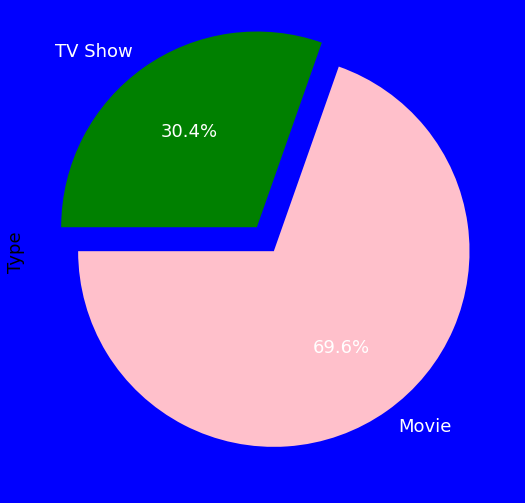

In [40]:
plt.figure(facecolor="blue",figsize=(9,9))
(df["type"].value_counts()/len(df["type"]) *100).plot.pie(explode=(0, 0.15), colors =["pink", "green"],
                       startangle=180,autopct='%1.1f%%',textprops={'color':"white"},fontsize=18)
plt.ylabel("Type",color="black", fontsize=18);


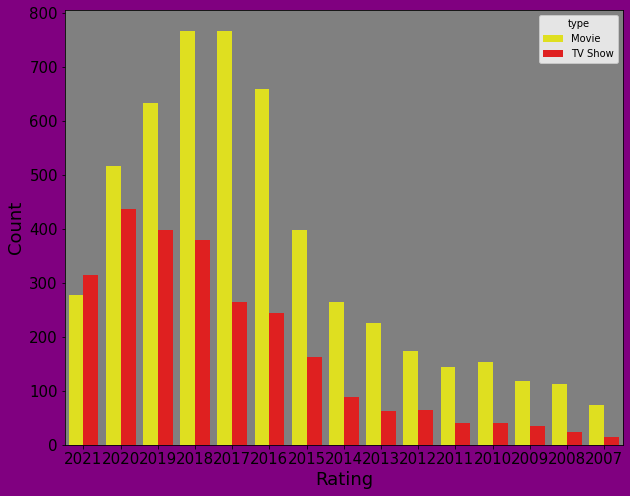

In [44]:
plt.figure(figsize=(10,8),facecolor="purple")
plt.axes().set_facecolor("grey")
sns.countplot(data=df, x= "release_year", hue ="type", palette=["yellow", "red"],order=df["release_year"].value_counts().index.sort_values(ascending=False)[:15])
plt.xlabel("Rating",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.xticks(fontsize= 15 )
plt.yticks(fontsize= 15 );